In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150   #data quality-pixels
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read data
df = pd.read_csv(r'C:\Users\Rajesh Gonnade\Downloads\delivery_time.csv')
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [3]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

array([[<AxesSubplot:title={'center':'Delivery_Time'}>,
        <AxesSubplot:title={'center':'Sorting_Time'}>]], dtype=object)

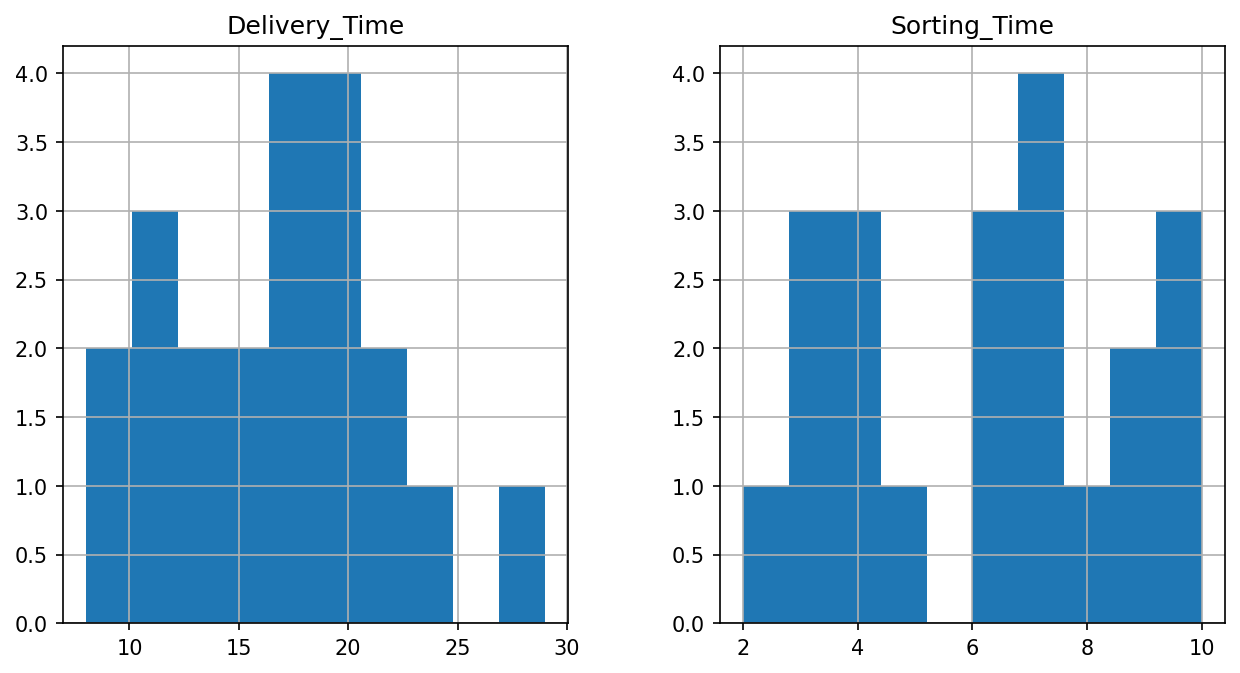

In [8]:
df.hist()

In [9]:
df.skew()

Delivery_Time    0.352390
Sorting_Time     0.047115
dtype: float64

In [10]:
#distribution of delivery times is slightly skewed towards longer delivery times.
#distribution of sorting times is almost symmetric around the mean.

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

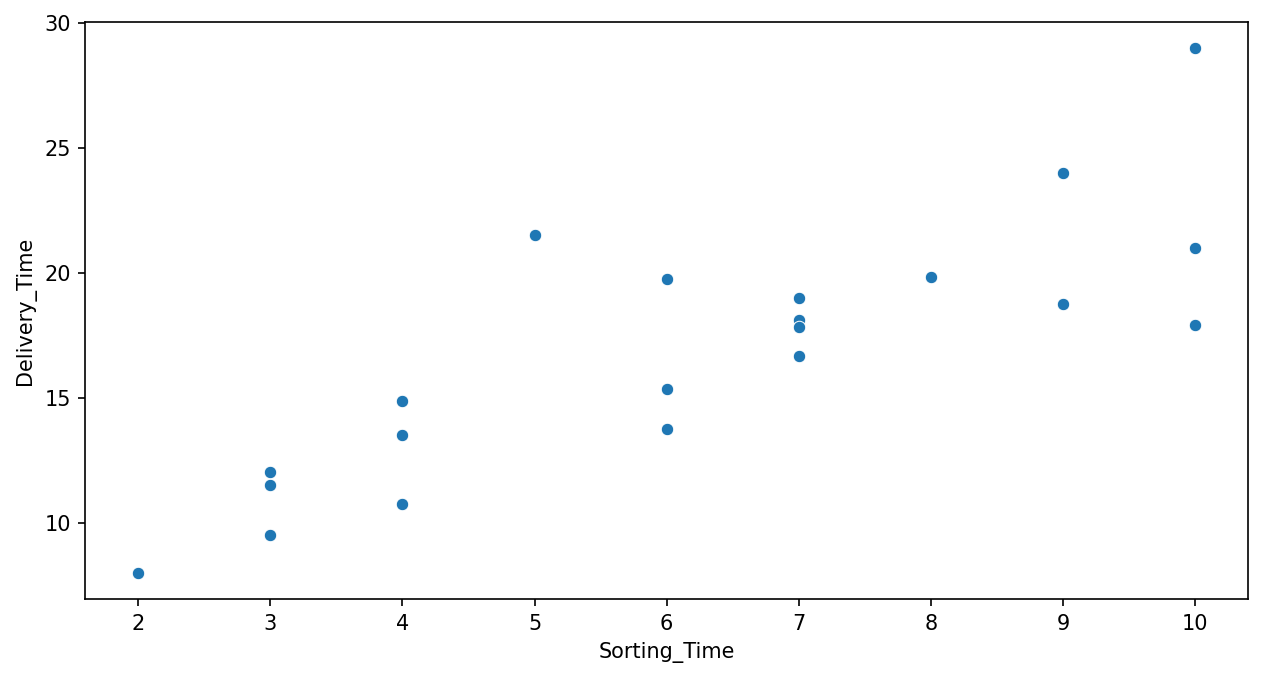

In [11]:
sns.scatterplot(x = df['Sorting_Time'],y = df['Delivery_Time'])

In [12]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [13]:
#strong positive linear relationship 

<AxesSubplot:>

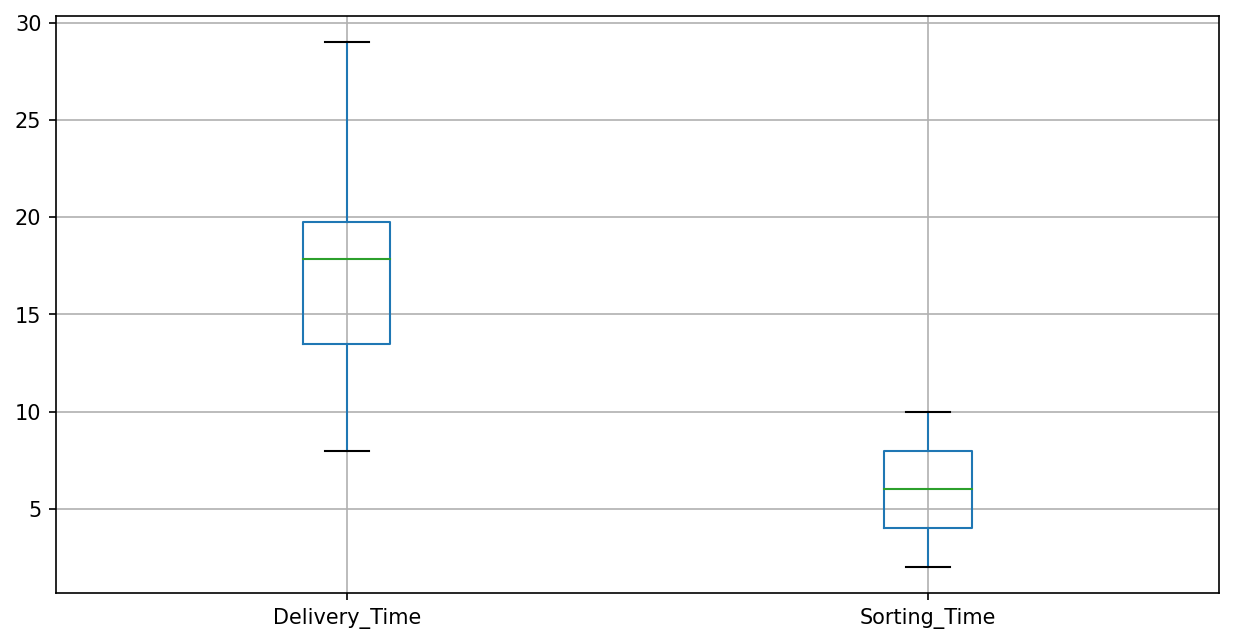

In [14]:
df.boxplot()

In [15]:
#  NO outliers are present

# Log Transformation

In [16]:
#Log transformation is used to reduce skewness in the distribution of data. 
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [17]:
df['log_Delivery_Time'] = np.log(df['Delivery_Time'])
df.head()

,Delivery_Time,Sorting_Time,log_Delivery_Time
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


In [18]:
df['log_Sorting_Time'] = np.log(df['Sorting_Time'])
df.head()

,Delivery_Time,Sorting_Time,log_Delivery_Time,log_Sorting_Time
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585


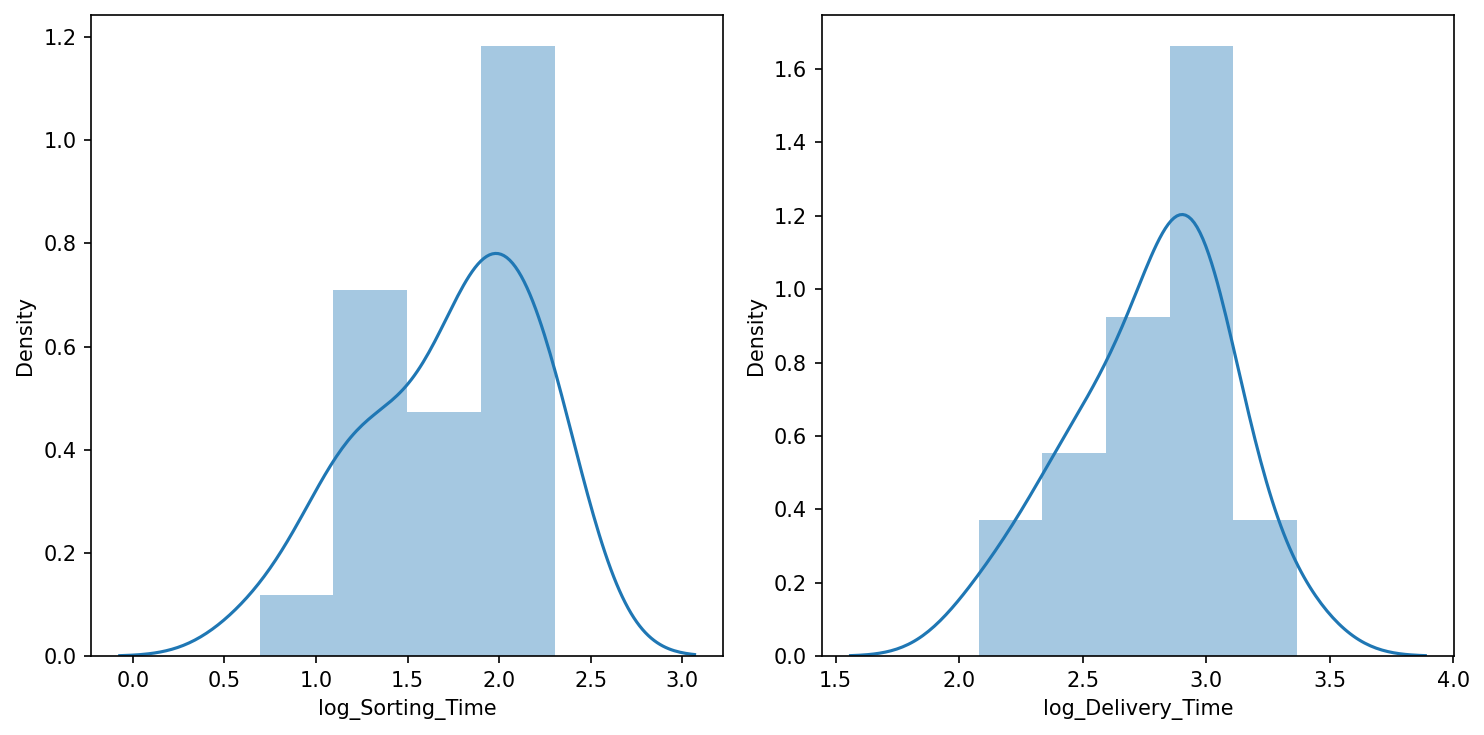

In [19]:
plt.subplot(1,2,2)
sns.distplot(df['log_Delivery_Time'])

plt.subplot(1,2,1)  
sns.distplot(df['log_Sorting_Time'])

plt.tight_layout()

In [20]:
df['log_Delivery_Time'].skew(), df['log_Sorting_Time'].skew()

(-0.4512901148522999, -0.6052357185134765)

In [21]:
import statsmodels.formula.api as smf
model = smf.ols('log_Delivery_Time~log_Sorting_Time',data=df).fit()
model

In [22]:
model.params

Intercept           1.741987
log_Sorting_Time    0.597522
dtype: float64

In [23]:
model.pvalues

Intercept           5.921137e-11
log_Sorting_Time    1.601539e-07
dtype: float64

In [24]:
model.rsquared, model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [25]:
# 77% Accuracy